In [1]:
#Installing scikit-learn
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.22.2.post1)


In [2]:
#checking installation
pip show scikit-learn

Name: scikit-learn
Version: 0.22.2.post1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /usr/local/lib/python3.6/dist-packages
Requires: numpy, scipy, joblib
Required-by: yellowbrick, umap-learn, textgenrnn, sklearn, sklearn-pandas, mlxtend, lucid, lightgbm, librosa, imbalanced-learn, fancyimpute


In [3]:
#Importing packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt # standard graphics
import seaborn as sns # fancier graphics
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from google.colab import files
files.upload()

Saving diabetes.csv to diabetes.csv


{'diabetes.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.257,43

In [0]:
#reading file
df = pd.read_csv("diabetes.csv")

In [7]:
#Observing the first 5 rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
#Observing the last 5 rows
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [9]:
#checking missing value
#No missing value
df.apply(lambda x: x.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
#data is not sparse 
df.dtypes.apply(pd.api.types.is_sparse) 

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

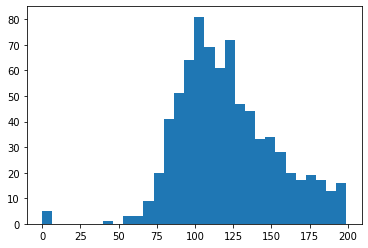

In [11]:
#Checking scalability 
plt.hist(df['Glucose'], bins=30)
plt.show()

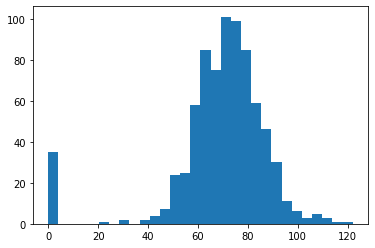

In [12]:
plt.hist(df['BloodPressure'], bins=30)
plt.show()

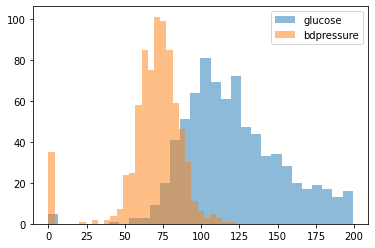

In [13]:
glucose = [df['Glucose']]
bdpressure = [df['BloodPressure']]
plt.hist(glucose, alpha=0.5, label='glucose', bins=30)
plt.hist(bdpressure, alpha=0.5, label='bdpressure', bins=30)
plt.legend(loc='upper right')
plt.show()

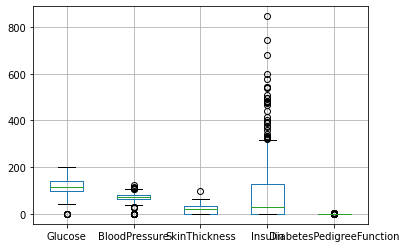

In [14]:
df.boxplot(column = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction'])

*Apparently there is a scalability issue which is quite important for KNN algorithms mainly due to the reason that it computes the distance to the  K values in the neighborhood. 

In [0]:
#Preprocessing
X = df.iloc[:, :-1].values
y = df.iloc[:, 4].values

In [0]:
#Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

*Beforing running KNN algorithm there is a need to bring all variables to the same scale as computation is based on Euclidean Distance. From this point of view, KNN is pretty sensitive to the scale. 

In [0]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
#Running KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
#Predicting on test dataset in order to compare with the train dataset 
y_pred = classifier.predict(X_test)

In [20]:
#Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[78  1  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
              precision    recall  f1-score   support

           0       0.75      0.96      0.84        81
          16       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          38       0.00      0.00      0.00         0
          40       0.00      0.00      0.00         1
          43       0.00      0.00      0.00         0
          44       0.00      0.00      0.00         2
          45       0.00      0.00      0.00         1
          48       0.00      0.00      0.00         0
          49       0.00      0.00      0.00         1
          50       0.00      0.00      0.00         1
          52       0.00      0.00      0.00         1
          54       0.00      0.00

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

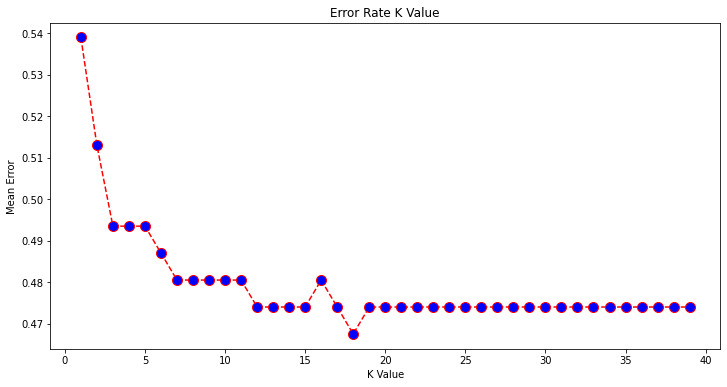

In [22]:
#Plotting mean error against K value
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [23]:
#Calculating mean accuracy, standarnd deviation accuracy 
#Checking accuracy results for different number of K values
Ks = 40
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.46103896, 0.48701299, 0.50649351, 0.50649351, 0.50649351,
       0.51298701, 0.51948052, 0.51948052, 0.51948052, 0.51948052,
       0.51948052, 0.52597403, 0.52597403, 0.52597403, 0.52597403,
       0.51948052, 0.52597403, 0.53246753, 0.52597403, 0.52597403,
       0.52597403, 0.52597403, 0.52597403, 0.52597403, 0.52597403,
       0.52597403, 0.52597403, 0.52597403, 0.52597403, 0.52597403,
       0.52597403, 0.52597403, 0.52597403, 0.52597403, 0.52597403,
       0.52597403, 0.52597403, 0.52597403, 0.52597403])

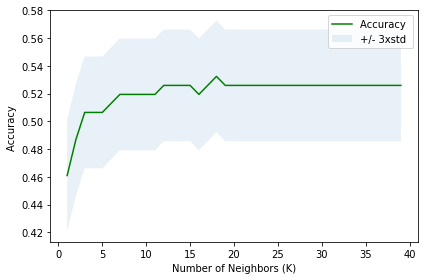

In [24]:
#Plotting accuracy against number of K neighbors 
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [25]:
#Checking the k value for which the model gets the highest accuracy 
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.5324675324675324 with k= 18


*After solving scalability issue KNN algorithm was executed on train and test set. After making confusion matrix model yielded lower accuracy result. Therefore, mean error was calculated. According to the plot which shows mean error against number of neighbors one can visually observe that the number of neighbors between 15 and 20 results in the lower mean error. Subsequently, I tried to check accuracy results for different number of neighbors and plotted accuracy against numbers of neighbors. In the end, I checked the K value for which the model gets the highest accuracy. K value at 18 gets the best accuracy. In general, accuracy results are below 53%. If we compare n_neighbors=5 and n_neighbors=18 we will see that accuracy improves only 2%. Therefore, one can claim these results are not related to KNN algorithm. In order to improve accuracy classification models can be applied as this dataset is related to diabetics and it has 2 binary outcomes.